In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [43]:
youtube_video = "https://www.youtube.com/watch?v=Hu4Yvq-g7_Y"

In [44]:
video_id = youtube_video.split("=")[1]

In [45]:
video_id


'Hu4Yvq-g7_Y'

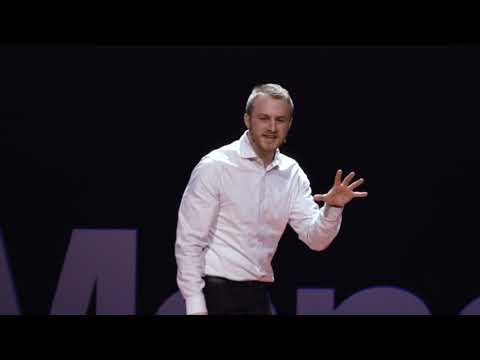

In [46]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [47]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [48]:
transcript[0:5]

[{'text': 'Translator: Viviane P.\nReviewer: Amanda Chu',
  'start': 0.0,
  'duration': 6.575},
 {'text': 'A few years ago,', 'start': 6.575, 'duration': 1.681},
 {'text': 'I began to observe\nsomething in my own behavior',
  'start': 8.256,
  'duration': 4.286},
 {'text': 'that made me a bit uncomfortable.',
  'start': 12.542,
  'duration': 4.103},
 {'text': 'And that was that from the moment\nthat I woke up to the end of the day,',
  'start': 16.645,
  'duration': 5.882}]

In [49]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

13696


In [50]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [51]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

input text 
 Translator: Viviane P.
Reviewer: Amanda Chu A few years ago, I began to observe
something in my own behavior that made me a bit uncomfortable. And that was that from the moment
that I woke up to the end of the day, my life was a series of screens. I started the day with the thing that woke me up
first thing in the morning, my phone, and so I sat there in bed watching
various cooking videos on Instagram and bouncing around between a bunch
of different applications. But then it was time
to get out of bed and cook breakfast, and so the thing that I focused then on, in addition to the omelette in the pan, was the iPad that was
right next to the oven. And then it was time to do some work, and so I went to a different screen which was attached
to another screen itself. All the while, this little devil on my wrist was tapping and beeping
and blooping and distracting me as I was trying
to get important stuff done. But there was one particular offender
out of all of these different

In [52]:
len(str(summarized_text))

4688

In [53]:
str(summarized_text)

'[\' Amanda Chu: "From the moment I woke up to the end of the day, my life was a series of screens" "I started the day with the thing that woke me up first thing in the morning, my phone," she says . "All the while, this little devil on my wrist was tapping and beeping and blooping and distracting me"\', \' "I wasted more time on my phone than anything else," says John Sutter . Sutter: "I decided to essentially, for all intents and purposes, get rid of the thing for a month" "It took about a week to adjust downward into a new, progressivelylower level of stimulation," he says .\', \' Aims to get to the bottom of what it takes to focus in a world of distraction . Pored over hundreds of research papers from front to back at his office . Travelled out to meet experts around the world who study focus . Had 25,000 words of research notes about why this is the case .\', " We pay attention to the world around us and how much control we have over our focus. We think the problem is that our bra